In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../data/raw/bank.csv")

In [6]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## 📝 Observation 

- The dataset contains no true NaN values
- However, several categorical columns contain "unknown" values, which represent missing or undisclosed information

In [7]:
(df == "unknown").sum()


age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

### Handling "unknown" Values

Although the dataset does not contain explicit missing values (NaN), several categorical columns include the value "unknown". These values were treated as a separate category rather than being removed or replaced.

This decision was made because:
- "unknown" may represent meaningful customer behavior (e.g., undisclosed job or education)
- Dropping rows would reduce data size and worsen class imbalance
- Replacing with mode could introduce bias

Therefore, all "unknown" values were retained as a valid category.


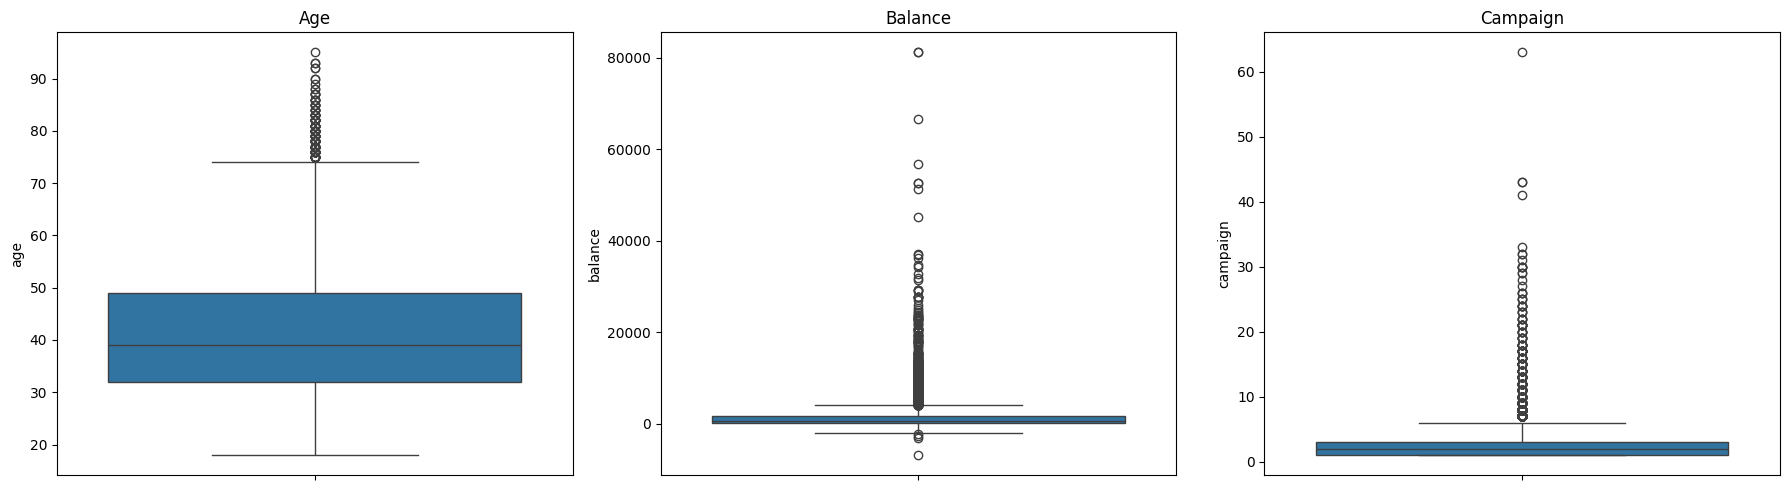

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title("Age")

sns.boxplot(y=df['balance'], ax=axes[1])
axes[1].set_title("Balance")

sns.boxplot(y=df['campaign'], ax=axes[2])
axes[2].set_title("Campaign")

plt.tight_layout()
plt.show()


In [9]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

for col in ['age', 'balance', 'campaign']:
    lower, upper = detect_outliers_iqr(df[col])
    print(f"{col}: Lower={lower}, Upper={upper}")


age: Lower=6.5, Upper=74.5
balance: Lower=-2257.0, Upper=4087.0
campaign: Lower=-2.0, Upper=6.0


In [12]:
for col in ['balance', 'campaign']:
    lower, upper = detect_outliers_iqr(df[col])
    df[col] = df[col].clip(lower, upper)


### Outlier Handling

Outliers were identified using boxplots and the Interquartile Range (IQR) method.

- **Age:** Extreme values were retained as they represent realistic customer ages.
- **Balance:** Extremely high values were capped using IQR limits to reduce skewness.
- **Campaign:** High values were capped, as excessive contact attempts may distort model learning.

Capping was preferred over removal to preserve dataset size and customer behavior patterns.


In [13]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [16]:
binary_cols = ['deposit', 'housing', 'loan', 'default']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


### Data Type Fixing

Categorical columns were converted to the `category` data type to ensure correct handling during encoding and modeling.

Binary columns containing "yes"/"no" values were converted into numerical format (1/0).  
The target variable **deposit** was encoded as:
- 1 → Customer subscribed to a term deposit
- 0 → Customer did not subscribe

This conversion is necessary to make the data suitable for machine learning algorithms.


In [17]:
df['deposit'].value_counts()


deposit
0    5873
1    5289
Name: count, dtype: int64

In [20]:
# Save cleaned dataset after data cleaning (up to step 2.3)
df.to_csv("../data/processed/bank_cleaned.csv", index=False)
